In [1]:
import sqlite3

In [2]:
import pandas as pd

In [3]:
import numpy as np

In [13]:
import seaborn as sns 

In [14]:
import matplotlib.pyplot as plt  

In [15]:
dbconn = sqlite3.connect('/home/d/Documents/SQL/CrimeAnalysis/CrimeDB')
print(dbconn) #check the connection 

In [16]:
# convert the results of the query to a dataframe so python can process it better
df = pd.read_sql_query("SELECT PercentOfHousingCrowded,PercentHouseHoldsBelowPoverty,Percent16AndUpUnemployed,Percent25AndUpWithoutHighSchoolDiploma,PercentOver64OrUnder18,PerCapitaIncome,HardshipIndex FROM Census_Data_Selected_socioeconomic_indicators_in_Chicago__2008_2012", dbconn)

In [17]:
df = pd.DataFrame(df)

In [18]:
df.head()

,PercentOfHousingCrowded,PercentHouseHoldsBelowPoverty,Percent16AndUpUnemployed,Percent25AndUpWithoutHighSchoolDiploma,PercentOver64OrUnder18,PerCapitaIncome,HardshipIndex
0,7.7,23.6,8.7,18.2,27.5,23939,39.0
1,7.8,17.2,8.8,20.8,38.5,23040,46.0
2,3.8,24.0,8.9,11.8,22.2,35787,20.0
3,3.4,10.9,8.2,13.4,25.5,37524,17.0
4,0.3,7.5,5.2,4.5,26.2,57123,6.0


In [19]:
df.dtypes # show different datatypes per column  

PercentOfHousingCrowded                   float64
PercentHouseHoldsBelowPoverty             float64
Percent16AndUpUnemployed                  float64
Percent25AndUpWithoutHighSchoolDiploma    float64
PercentOver64OrUnder18                    float64
PerCapitaIncome                             int64
HardshipIndex                             float64
dtype: object

In [56]:
#convert PerCapitaIncome to a float 
df["PerCapitaIncome"] = df["PerCapitaIncome"].astype(float)

In [57]:
# check types again 
df.dtypes 

PercentOfHousingCrowded                   float64
PercentHouseHoldsBelowPoverty             float64
Percent16AndUpUnemployed                  float64
Percent25AndUpWithoutHighSchoolDiploma    float64
PercentOver64OrUnder18                    float64
PerCapitaIncome                           float64
HardshipIndex                             float64
dtype: object

In [49]:
df.describe() # summary statistics for each column 

,PercentOfHousingCrowded,PercentHouseHoldsBelowPoverty,Percent16AndUpUnemployed,Percent25AndUpWithoutHighSchoolDiploma,PercentOver64OrUnder18,PerCapitaIncome,HardshipIndex
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,77.000000
mean,4.920513,21.739744,15.341026,20.330769,35.717949,25597.000000,49.506494
std,3.658981,11.457231,7.499497,11.746514,7.284421,15196.405541,28.690556
min,0.300000,3.300000,4.700000,2.500000,13.500000,8201.000000,1.000000
25%,2.325000,13.350000,9.200000,12.075000,32.150000,15804.750000,25.000000
50%,3.850000,19.050000,13.850000,18.650000,38.050000,21668.500000,50.000000
75%,6.800000,29.150000,20.000000,26.600000,40.500000,28715.750000,74.000000
max,15.800000,56.500000,35.900000,54.800000,51.500000,88669.000000,98.000000


In [50]:
df[["HardshipIndex"]].describe()

,HardshipIndex
count,77.000000
mean,49.506494
std,28.690556
min,1.000000
25%,25.000000
50%,50.000000
75%,74.000000
max,98.000000


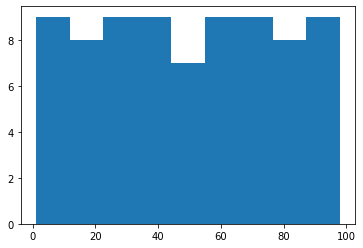

In [68]:
#create and show the distribution of the data for HardshipIndex
bins = 9 # how do I find how many bins to use on a histogram? 
plt.hist(df[["HardshipIndex"]],bins) 
plt.show()
# can we figure out why this is empty? 

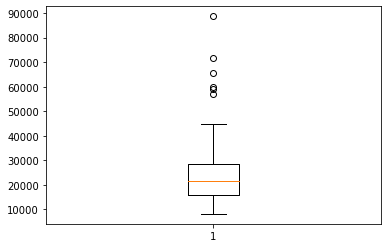

In [55]:
#create and show the distribution of the data for PerCapitaIncome
plt.boxplot(df[["PerCapitaIncome"]]) 
plt.show()

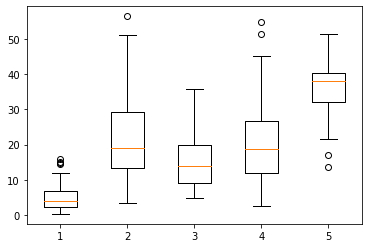

In [35]:
#create and show the distribution of data in these columns. 
plt.boxplot(df[["PercentOfHousingCrowded","PercentHouseHoldsBelowPoverty","Percent16AndUpUnemployed","Percent25AndUpWithoutHighSchoolDiploma","PercentOver64OrUnder18"]]) 
plt.show()

<AxesSubplot:>

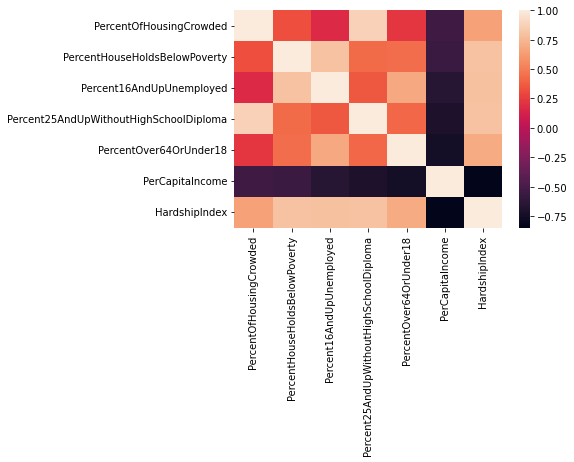

In [11]:
sns.heatmap(df.corr()) # visual representation of correlation between variables 

In [12]:
df.corr() # numerical epresentation of correlation between variables 

,PercentOfHousingCrowded,PercentHouseHoldsBelowPoverty,Percent16AndUpUnemployed,Percent25AndUpWithoutHighSchoolDiploma,PercentOver64OrUnder18,PerCapitaIncome,HardshipIndex
PercentOfHousingCrowded,1.000000,0.319403,0.165299,0.875959,0.224692,-0.541730,0.649574
PercentHouseHoldsBelowPoverty,0.319403,1.000000,0.800084,0.424294,0.435894,-0.567025,0.803267
Percent16AndUpUnemployed,0.165299,0.800084,1.000000,0.355518,0.676532,-0.656619,0.792294
Percent25AndUpWithoutHighSchoolDiploma,0.875959,0.424294,0.355518,1.000000,0.408878,-0.709770,0.802538
PercentOver64OrUnder18,0.224692,0.435894,0.676532,0.408878,1.000000,-0.754844,0.690844
PerCapitaIncome,-0.541730,-0.567025,-0.656619,-0.709770,-0.754844,1.000000,-0.849167
HardshipIndex,0.649574,0.803267,0.792294,0.802538,0.690844,-0.849167,1.000000
